In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

bank = pd.read_csv("bank.csv", delimiter=";")

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [13]:
#shape of dataset
bank.shape

(4521, 17)

In [14]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [15]:

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [16]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [17]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [18]:
# no null values
pd.isnull(bank).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

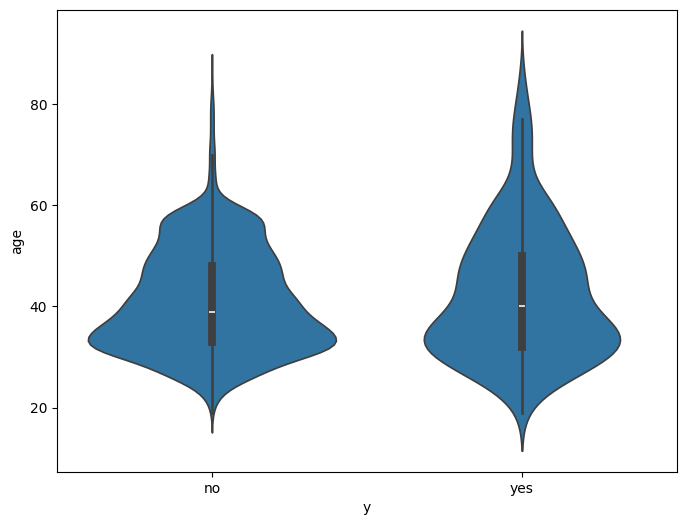

In [22]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="y", y="age", data=bank)
plt.show()

In [24]:
bank["y"].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

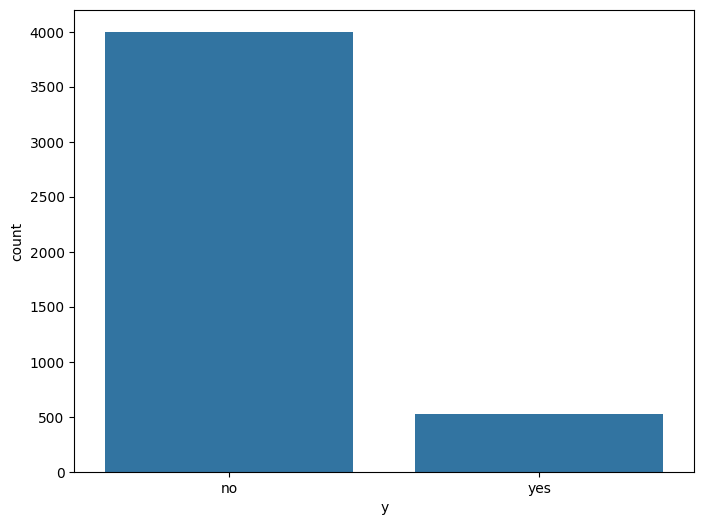

In [25]:
sns.countplot(data=bank,x=bank['y'])

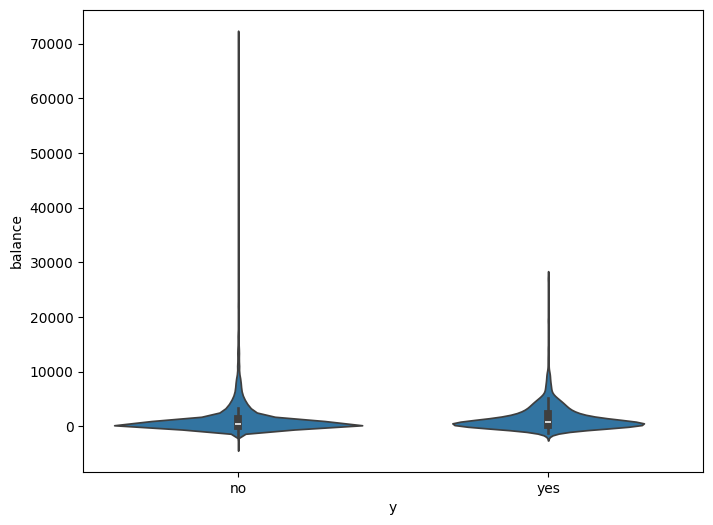

In [27]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="y", y="balance", data=bank)
plt.show()

In [28]:
bank.rename(columns={"y": "deposit"}, inplace=True)

In [30]:
bank["poutcome"].value_counts()

poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64

<Axes: xlabel='poutcome'>

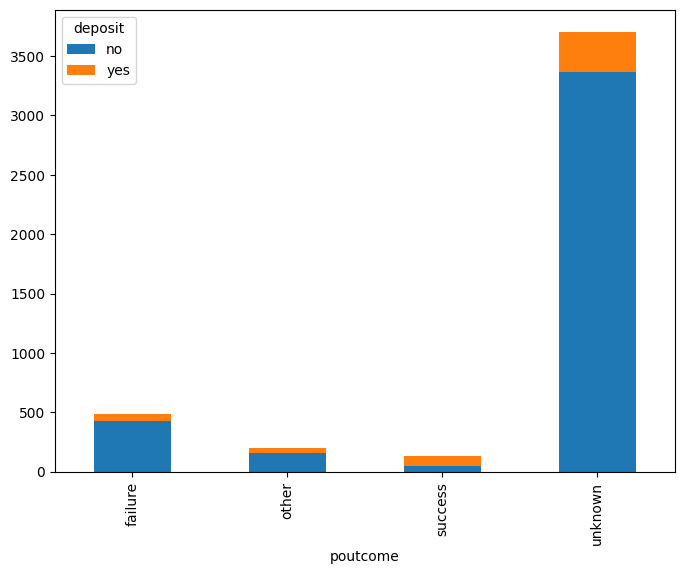

In [31]:
# bar chart for poutcome
types = bank.groupby("poutcome")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [32]:
bank["previous"].value_counts()

previous
0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
20       1
18       1
13       1
19       1
15       1
24       1
17       1
22       1
23       1
25       1
Name: count, dtype: int64

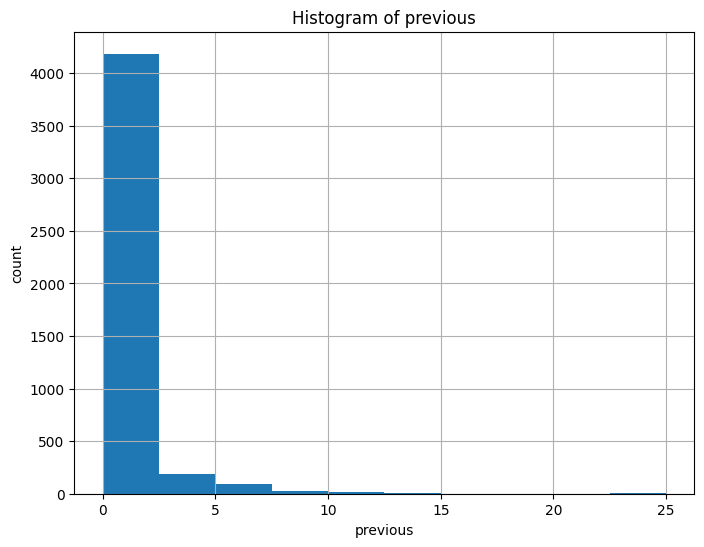

In [33]:
#histogram of previous
bank['previous'].hist()
plt.title('Histogram of previous')
plt.ylabel('count')
plt.xlabel('previous');
plt.show()

In [34]:
bank["pdays"].value_counts()

pdays
-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 231       1
 331       1
 804       1
 144       1
 234       1
Name: count, Length: 292, dtype: int64

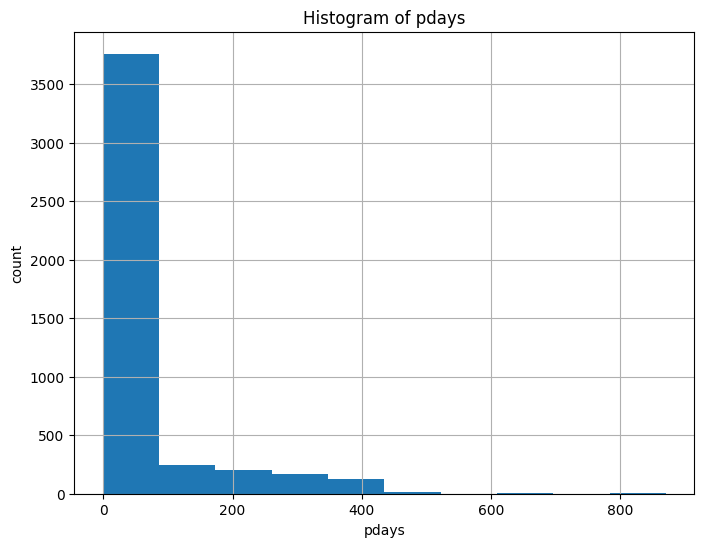

In [35]:
#histogram of pdays
bank['pdays'].hist()
plt.title('Histogram of pdays')
plt.ylabel('count')
plt.xlabel('pdays');
plt.show()

In [36]:
bank["campaign"].value_counts()

campaign
1     1734
2     1264
3      558
4      325
5      167
6      155
7       75
8       56
9       30
10      27
11      22
12      21
13      17
14      10
15       9
16       8
17       7
18       7
25       4
24       3
28       3
20       3
19       3
32       2
23       2
21       2
22       2
29       1
30       1
50       1
31       1
44       1
Name: count, dtype: int64

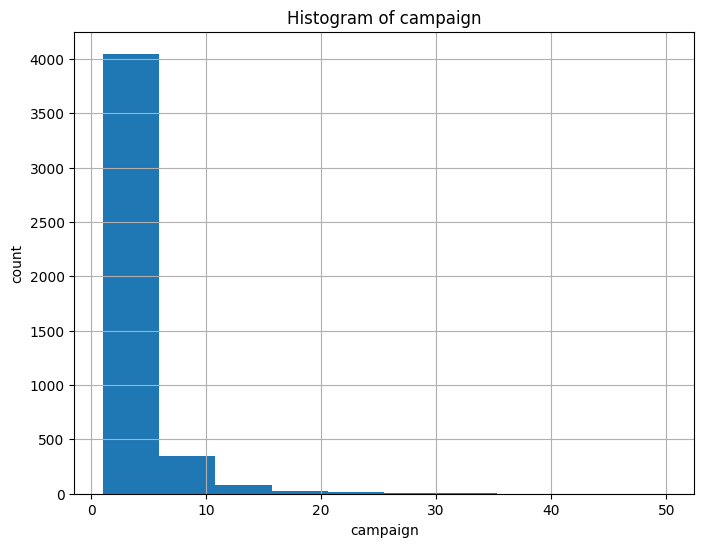

In [37]:
#Histogram of campaign
bank['campaign'].hist()
plt.title('Histogram of campaign')
plt.ylabel('count')
plt.xlabel('campaign');
plt.show()

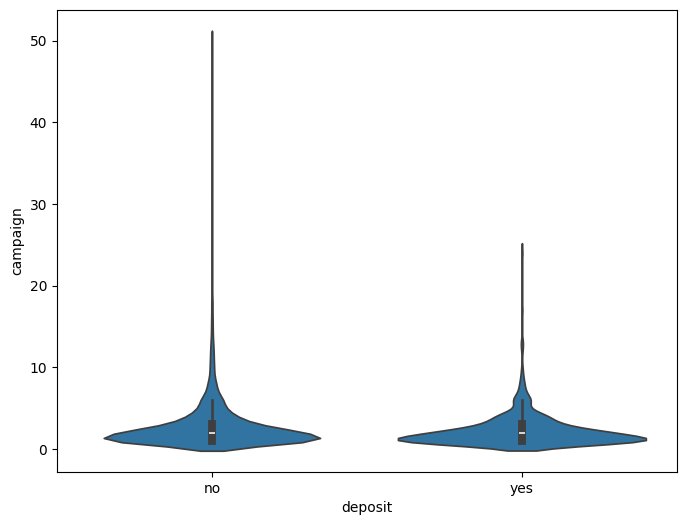

In [39]:
plt.figure(figsize=(8,6))
sns.violinplot(x="deposit", y="campaign", data=bank)
plt.show()

In [40]:
bank["month"].value_counts()

month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64

<Axes: xlabel='month'>

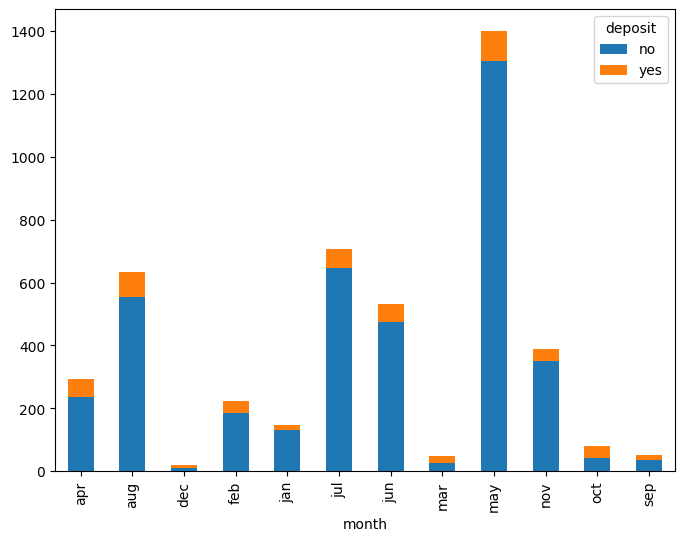

In [41]:
#bar chart for month
types = bank.groupby("month")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [42]:
bank["day"].value_counts()

day
20    257
18    226
19    201
21    198
14    195
17    191
7     190
6     187
28    181
5     181
8     180
29    175
15    174
30    168
13    166
16    164
9     163
11    152
12    151
4     139
2     114
27    113
26    110
3     105
23    102
22     86
25     80
31     59
10     50
24     36
1      27
Name: count, dtype: int64

<Axes: xlabel='day'>

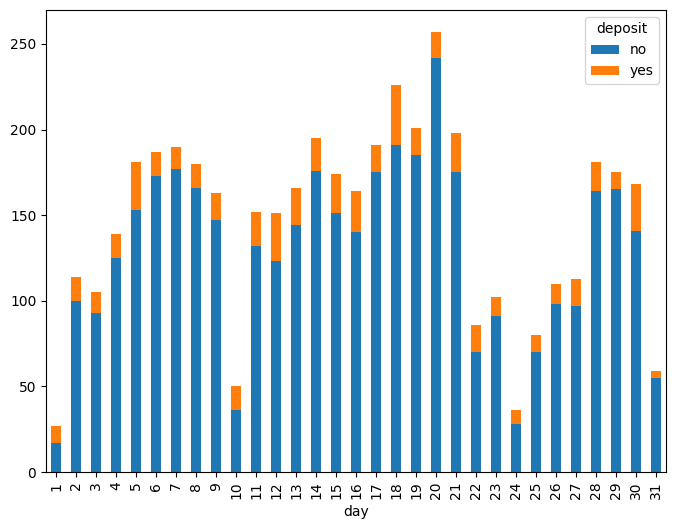

In [43]:
# group by days to display bar chart
types = bank.groupby("day")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [44]:
bank["contact"].value_counts()

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

<Axes: xlabel='contact'>

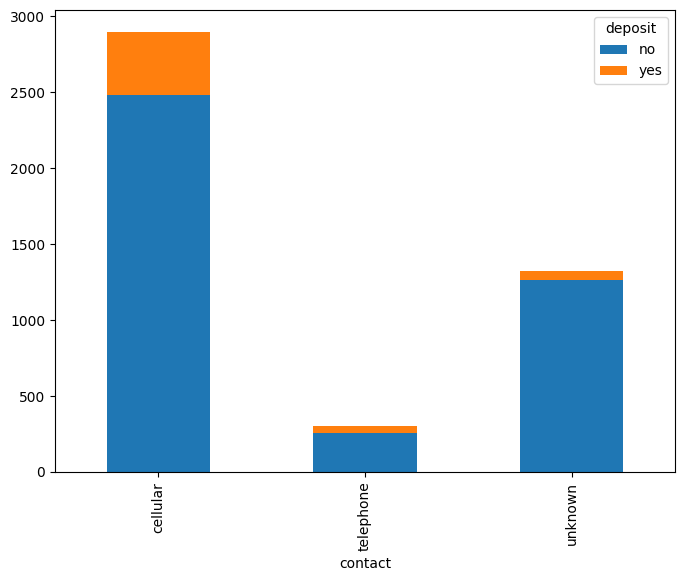

In [45]:
# group by contact to display bar chart
types = bank.groupby("contact")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [46]:
bank["loan"].value_counts()

loan
no     3830
yes     691
Name: count, dtype: int64

<Axes: xlabel='loan'>

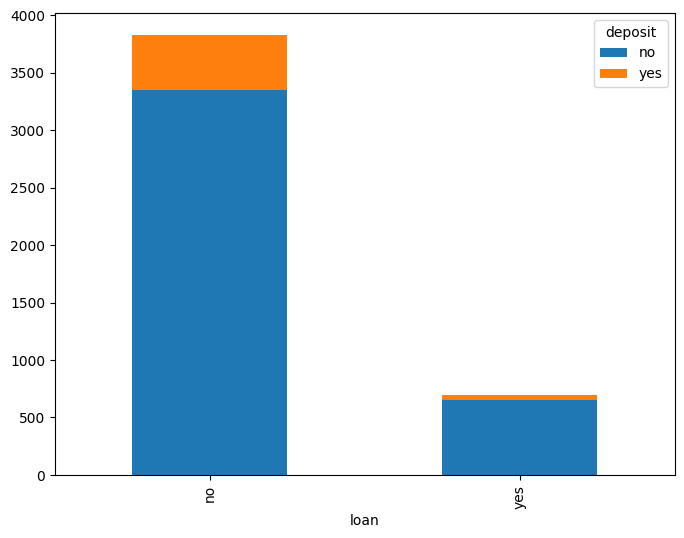

In [47]:
# group by loan to display bar chart
types = bank.groupby("loan")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

<Axes: xlabel='marital'>

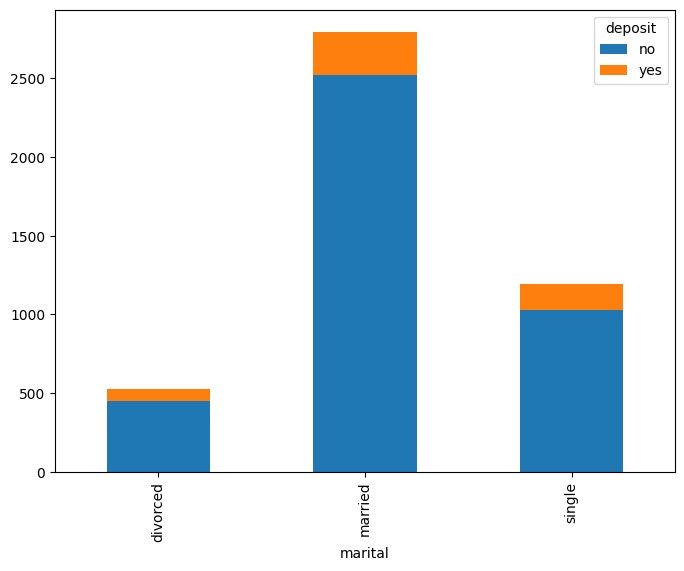

In [48]:
# group by marital to display bar chart
types = bank.groupby("marital")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [49]:
bank["housing"].value_counts()

housing
yes    2559
no     1962
Name: count, dtype: int64

<Axes: xlabel='housing'>

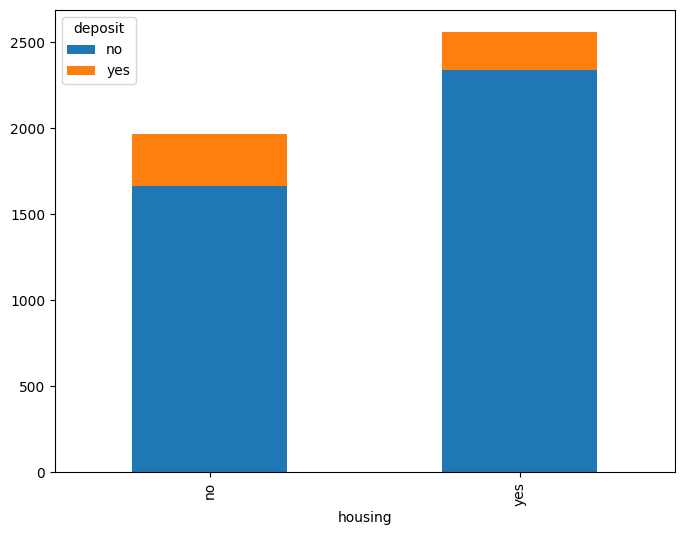

In [50]:
# group by housing to display bar chart
types = bank.groupby("housing")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [51]:
bank["default"].value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

<Axes: xlabel='default'>

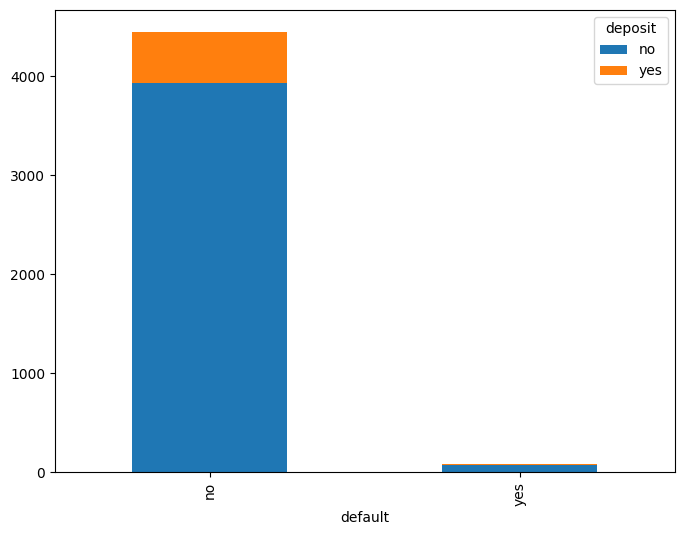

In [52]:
# group by default to display bar chart
types = bank.groupby("default")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [53]:
bank["job"].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

<Axes: xlabel='job'>

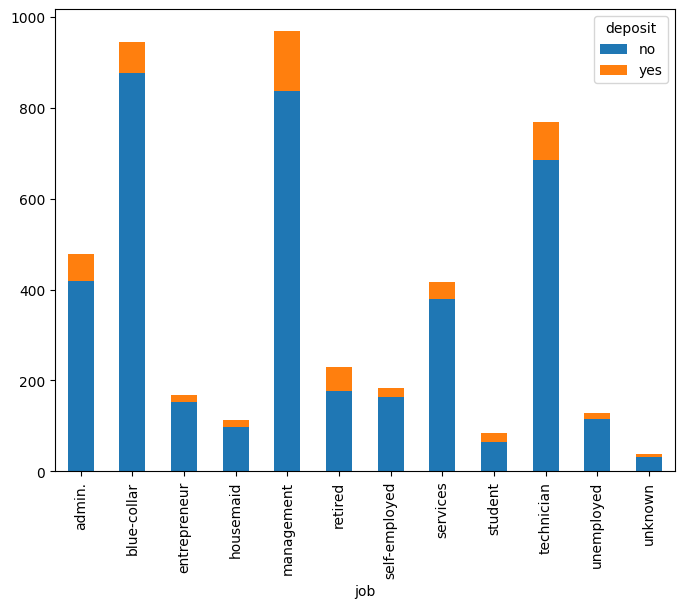

In [54]:
# group by job to display bar chart
types = bank.groupby("job")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

In [55]:
bank["education"].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

<Axes: xlabel='education'>

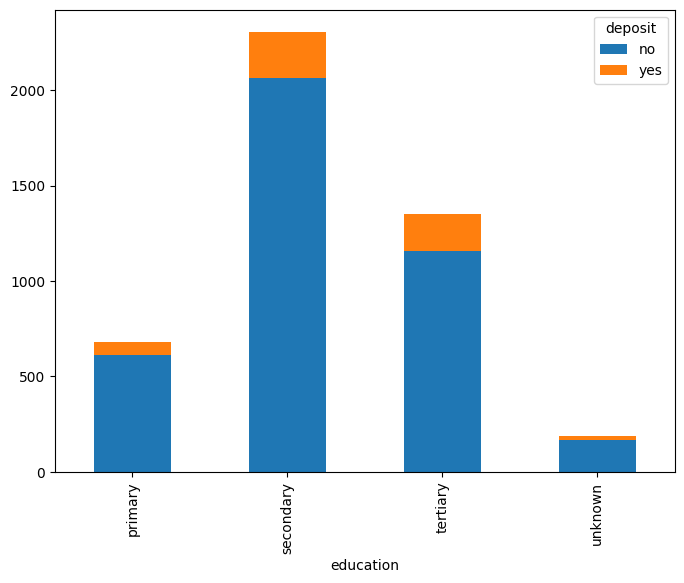

In [56]:
# group by education to display bar chart
types = bank.groupby("education")['deposit'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True')

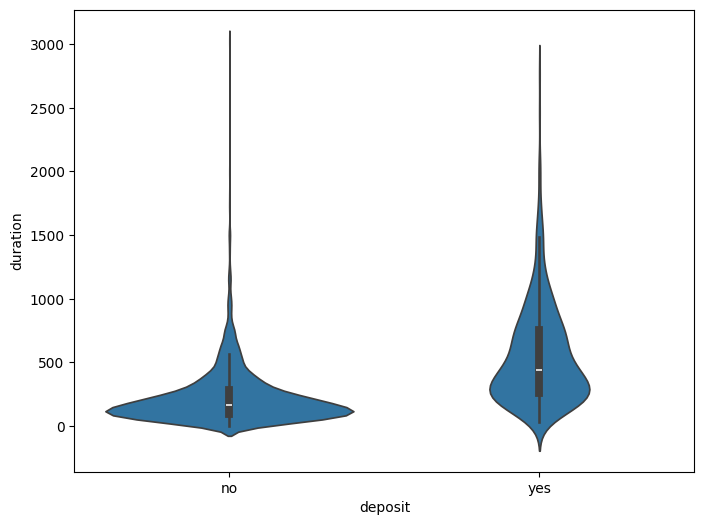

In [58]:
plt.figure(figsize=(8,6))
sns.violinplot(x="deposit", y="duration", data=bank)
plt.show()

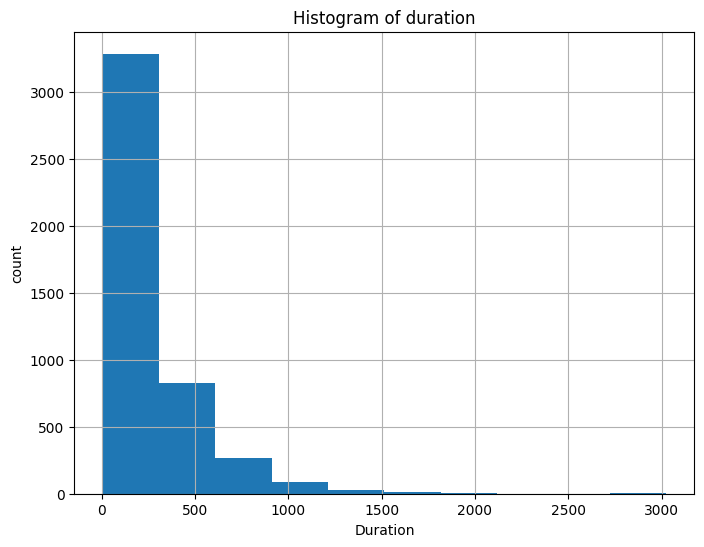

In [59]:
#Histogram of duration
bank['duration'].hist()
plt.title('Histogram of duration')
plt.ylabel('count')
plt.xlabel('Duration')
plt.show()

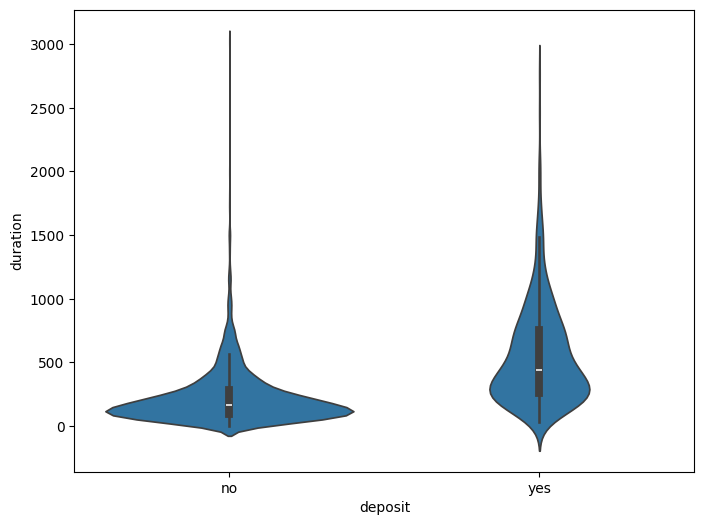

In [60]:
plt.figure(figsize=(8,6))
sns.violinplot(x="deposit", y="duration", data=bank)
plt.show()

In [187]:
bank = pd.read_csv("bank.csv", delimiter = ";")
bank.rename(columns={'y': 'deposit'}, inplace=True)

# Preprocessing The Data

In [189]:
# replacing yes and no from deposit column by 1 and 0 to convert categorical feature to numerical feature
bank['deposit'] = bank['deposit'].replace({'yes': 1, 'no': 0})
bank.head()
bank['deposit'].head()

0    0
1    0
2    0
3    0
4    0
Name: deposit, dtype: int64

In [191]:
# replacing yes and no from loan column by 1 and 0 to convert categorical feature to numerical feature
bank['loan'] = bank['loan'].replace({'yes':1, 'no':0}).astype(int)
bank.head()
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,no,1787,no,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,0,unknown,5,may,226,1,-1,0,unknown,0


In [193]:
bank['default'] = bank['default'].replace({'yes':1, 'no':0}).astype(int)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,0,1787,no,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,yes,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,yes,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,yes,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,yes,0,unknown,5,may,226,1,-1,0,unknown,0


In [195]:
bank['housing'] = bank['housing'].replace({'yes':1, 'no':0}).astype(int)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [196]:
# Apply one-hot encoding correctly
bank = pd.get_dummies(bank, columns=['marital'], drop_first=True, dtype=int)

In [197]:
bank.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital_married,marital_single
0,30,unemployed,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,1,0
1,33,services,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0,1,0
2,35,management,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,0,1
3,30,management,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,1,0
4,59,blue-collar,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,1,0


In [198]:
print(bank.columns)

Index(['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'deposit', 'marital_married', 'marital_single'],
      dtype='object')


In [199]:
bank = pd.get_dummies(bank, columns=['education'], drop_first=True, dtype=int)
bank.head()

,age,job,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,30,unemployed,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,1,0,0,0,0
1,33,services,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0,1,0,1,0,0
2,35,management,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,0,1,0,1,0
3,30,management,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,1,0,0,1,0
4,59,blue-collar,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,1,0,1,0,0


In [200]:
bank = pd.get_dummies(bank, columns=['job'], drop_first=True, dtype=int)
bank.head()


,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,30,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,35,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,30,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,59,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [201]:
bank = pd.get_dummies(bank, columns=['contact'], drop_first=True, dtype=int)
bank.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown
0,30,0,1787,0,0,19,oct,79,1,-1,0,unknown,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,33,0,4789,1,1,11,may,220,1,339,4,failure,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,35,0,1350,1,0,16,apr,185,1,330,1,failure,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,jun,199,4,-1,0,unknown,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,may,226,1,-1,0,unknown,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [202]:
bank = pd.get_dummies(bank, columns=['month'], drop_first=True, dtype=int)
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,deposit,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,0,1787,0,0,19,79,1,-1,0,unknown,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,1,11,220,1,339,4,failure,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,failure,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,unknown,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,59,0,0,1,0,5,226,1,-1,0,unknown,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [203]:
one_hot = pd.get_dummies(bank['poutcome'], prefix='poutcome', drop_first=True, dtype=int)
bank = bank.drop('poutcome', axis=1)
bank = bank.join(one_hot)
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [204]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   default              4521 non-null   int64
 2   balance              4521 non-null   int64
 3   housing              4521 non-null   int64
 4   loan                 4521 non-null   int64
 5   day                  4521 non-null   int64
 6   duration             4521 non-null   int64
 7   campaign             4521 non-null   int64
 8   pdays                4521 non-null   int64
 9   previous             4521 non-null   int64
 10  deposit              4521 non-null   int64
 11  marital_married      4521 non-null   int64
 12  marital_single       4521 non-null   int64
 13  education_secondary  4521 non-null   int64
 14  education_tertiary   4521 non-null   int64
 15  education_unknown    4521 non-null   int64
 16  job_blue-collar      452

In [205]:
tempDF=bank['deposit']

In [206]:
bank=bank.drop('deposit',axis=1)

In [207]:
bank['deposit']=tempDF
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,30,0,1787,0,0,19,79,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,33,0,4789,1,1,11,220,1,339,4,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,59,0,0,1,0,5,226,1,-1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [208]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(bank.drop('deposit',axis=1))
scaled_features=scaler.transform(bank.drop('deposit',axis=1))
bank_feat=pd.DataFrame(scaled_features,columns=bank.columns[:-1])
bank_feat.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,-1.056270,-0.130759,0.121072,-1.142051,-0.424756,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,0.785095,-0.599749,-1.020335,-0.652482,-0.207719,-0.514408,-0.196454,-0.159382,-0.522306,-0.231518,-0.205391,-0.318760,-0.137593,-0.452367,5.858354,-0.092068,-0.267071,-0.643536,-0.403496,-0.066659,-0.227244,-0.183968,-0.430185,-0.364805,-0.104676,-0.669064,-0.306828,7.450671,-0.107869,-0.213447,-0.171381,0.469300
1,-0.772583,-0.130759,1.118644,0.875617,2.354292,-0.596026,-0.169194,-0.576829,2.989044,2.041734,0.785095,-0.599749,0.980070,-0.652482,-0.207719,-0.514408,-0.196454,-0.159382,-0.522306,-0.231518,-0.205391,3.137153,-0.137593,-0.452367,-0.170696,-0.092068,-0.267071,-0.643536,-0.403496,-0.066659,-0.227244,-0.183968,-0.430185,-0.364805,-0.104676,1.494626,-0.306828,-0.134216,-0.107869,-0.213447,-0.171381,-2.130831
2,-0.583458,-0.130759,-0.024144,0.875617,-0.424756,0.010273,-0.303898,-0.576829,2.899143,0.270124,-1.273731,1.667363,-1.020335,1.532609,-0.207719,-0.514408,-0.196454,-0.159382,1.914585,-0.231518,-0.205391,-0.318760,-0.137593,-0.452367,-0.170696,-0.092068,-0.267071,-0.643536,-0.403496,-0.066659,-0.227244,-0.183968,-0.430185,-0.364805,-0.104676,-0.669064,-0.306828,-0.134216,-0.107869,-0.213447,-0.171381,-2.130831
3,-1.056270,-0.130759,0.017726,0.875617,2.354292,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,0.785095,-0.599749,-1.020335,1.532609,-0.207719,-0.514408,-0.196454,-0.159382,1.914585,-0.231518,-0.205391,-0.318760,-0.137593,-0.452367,-0.170696,-0.092068,-0.267071,1.553915,-0.403496,-0.066659,-0.227244,-0.183968,-0.430185,2.741190,-0.104676,-0.669064,-0.306828,-0.134216,-0.107869,-0.213447,-0.171381,0.469300
4,1.686036,-0.130759,-0.472753,0.875617,-0.424756,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,0.785095,-0.599749,0.980070,-0.652482,-0.207719,1.943983,-0.196454,-0.159382,-0.522306,-0.231518,-0.205391,-0.318760,-0.137593,-0.452367,-0.170696,-0.092068,-0.267071,1.553915,-0.403496,-0.066659,-0.227244,-0.183968,-0.430185,-0.364805,-0.104676,1.494626,-0.306828,-0.134216,-0.107869,-0.213447,-0.171381,0.469300


In [209]:
bank_feat['deposit']=tempDF

In [210]:
bank_feat.to_csv("standardisedBank.csv")

# Co-relation with class variable 'deopsit'

In [211]:
CorrBank=bank_feat.drop("deposit", axis=1).apply(lambda x: x.corr(bank_feat.deposit))

In [212]:
Corr2=CorrBank.sort_values(ascending=False)

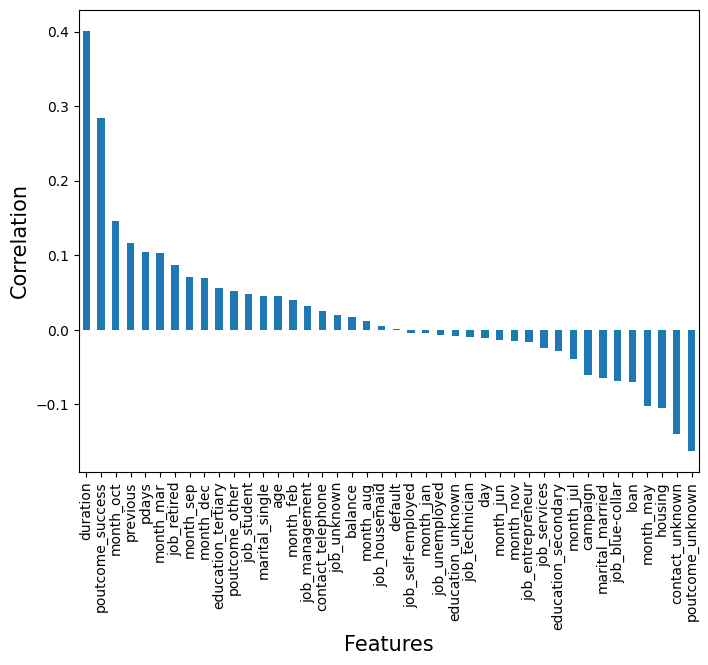

In [213]:
Corr2.plot.bar()
plt.xlabel("Features", fontsize=15)
plt.ylabel("Correlation", fontsize=15)


plt.show()